In [1]:
import pandas as pd

In [2]:
df_13 = pd.read_excel('data/20210913.xlsx', index_col=0)
df_14 = pd.read_excel('data/20210914.xlsx', index_col=0)

In [3]:
df_13.head()

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295
006840,AK홀딩스,27150,0,0.00,27000,27200,26250,21725,581595350,359671281150,13247561
027410,BGF,6250,-70,-1.11,6270,6350,6230,105306,661320960,598229943750,95716791
282330,BGF리테일,179000,-2000,-1.10,183000,183500,177500,23213,4178520500,3093819174000,17283906
138930,BNK금융지주,7970,50,0.63,7920,7970,7890,839034,6661342020,2597703910620,325935246


In [4]:
idx = df_14.index.difference(df_13.index)
print(idx)
print(df_14.loc[idx[0], '종목명'])

Index(['395400'], dtype='object', name='종목코드')
SK리츠


#### 시가총액의 증감률을 구해서 기준시가 총액유도 지수의 증감률 출력

In [5]:
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.006711949331194


#### 주식수가 변경된 종목이 있는지 확인 해보자

In [6]:
intersect_idx = df_14.index.intersection(df_13.index)
t_13 = df_13.loc[intersect_idx]
t_14 = df_14.loc[intersect_idx]
cond = t_13['상장주식수'] != t_14['상장주식수']
print(cond.all())

False


##### 조건 슬라이싱과  시리즈 연산으로 변경사항 종목들의 상장주식수 출렬 

In [7]:
t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']

종목코드
001570    499996
011930      5661
Name: 상장주식수, dtype: int64

####  주식수의 증가 에 따른 시가총액을 수정된 비교시가 총액에 반영 
#### 주식 증가액 

In [8]:
주식수증가액 = (t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']) * t_13.loc[cond, '종가']

전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액'] + 주식수증가액.sum()) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067108454394307


### 8.2 코스피와 삼성전자¶

In [9]:
df = pd.read_excel('data/20210914.xlsx', index_col=0, usecols=[0, 1, 2, 10])
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


#### 비중 컬럼을 내림차순으로 정렬

In [10]:
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100
df.sort_values('시가총액', ascending=False).head()

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643


#### 삼성전자와 코스피지수 유사도 산포도 OHLCV

In [12]:
import numpy as np

kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")

data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=["kospi", "samsung"])
df.head()

C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,kospi,samsung
0,3199.27,76700
1,3144.19,74600
2,3133.90,74300
3,3128.53,74600
4,3146.81,75700


<AxesSubplot:xlabel='samsung', ylabel='kospi'>

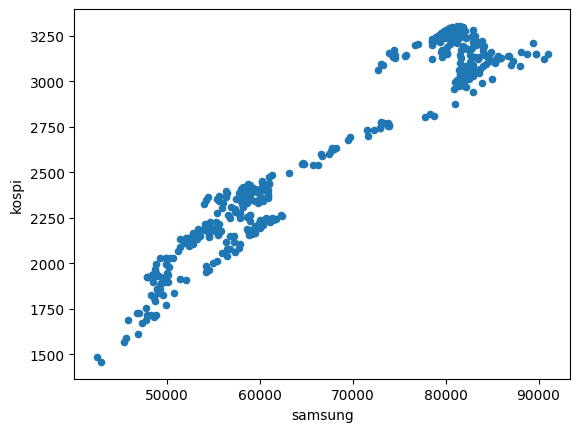

In [13]:
df.plot.scatter(x='samsung', y='kospi')

#### 상관계수를 계산하여 유사정도 수치화 

In [14]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


### 8.3 코스피 통계

In [15]:
import pandas as pd 

kospi = pd.read_excel("data/kospi.xlsx", index_col=0, parse_dates=True)
kospi.head()

C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235


In [16]:
print(kospi['종가'].max())
print(kospi['종가'].min())

3305.21
1457.64


In [17]:
cond = kospi['종가'] == kospi['종가'].max()
kospi.loc[cond]

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-07-06,3305.21,12.0,0.36,3295.44,3313.51,3295.44,1029465,14686383,2314417370


#### 코스피지수 종가 기준 최고가일 

In [18]:
print(kospi.loc[cond].index)
print(kospi.loc[cond].index[0])

DatetimeIndex(['2021-07-06'], dtype='datetime64[ns]', name='일자', freq=None)
2021-07-06 00:00:00


In [19]:
print(kospi['종가'].idxmax())
print(kospi['종가'].idxmin())

2021-07-06 00:00:00
2020-03-19 00:00:00


#### 코스피지수의 최대 상승폭과 최대 하락폭을 5개 출력

In [20]:
kospi = pd.read_excel("data/kospi.xlsx", index_col=0, usecols=[0, 1])
kospi["변동폭"] = kospi["종가"] - kospi["종가"].shift(1)
kospi.sort_values('변동폭').iloc[:5]

C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,변동폭
일자,,
2020/03/23,1482.46,-127.51
2021/01/07,3031.68,-120.50
2020/03/19,1457.64,-108.51
2020/06/15,2030.82,-107.23
2021/02/24,2994.98,-104.71


In [21]:
kospi.sort_values('변동폭', ascending=False).iloc[:5]

,종가,변동폭
일자,,
2020/03/18,1591.20,133.56
2020/06/12,2132.30,101.48
2021/01/28,3069.05,92.84
2021/02/25,3099.69,86.74
2020/08/19,2360.54,86.32


In [22]:
print(kospi["변동폭"].nlargest(n=5))
print(kospi["변동폭"].nsmallest(n=5))

일자
2020/03/18    133.56
2020/06/12    101.48
2021/01/28     92.84
2021/02/25     86.74
2020/08/19     86.32
Name: 변동폭, dtype: float64
일자
2020/03/23   -127.51
2021/01/07   -120.50
2020/03/19   -108.51
2020/06/15   -107.23
2021/02/24   -104.71
Name: 변동폭, dtype: float64


#### 월별 코스피 시가/고가/저가/종가 코스피의 월간 OHLCV

In [23]:
kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1, 4, 5, 6, 7], parse_dates=[0])
how = {
    '시가' : 'first',
    '고가' : max,
    '저가' : min,
    '종가' : 'last',
    '거래량' : sum
}
df = kospi.groupby( pd.Grouper(key='일자', freq='m') ).agg(how)
df.head()

C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497


#### Grouper 사용

In [25]:
#df.groupby('A') 의 구문 설탕
df = pd.DataFrame(
...     {
...         "Animal": ["Falcon", "Parrot", "Falcon", "Falcon", "Parrot"],
...         "Speed": [100, 5, 200, 300, 15],
...     }
... )
df

,Animal,Speed
0,Falcon,100
1,Parrot,5
2,Falcon,200
3,Falcon,300
4,Parrot,15


In [26]:
df.groupby(pd.Grouper(key="Animal")).mean()

,Speed
Animal,
Falcon,200.0
Parrot,10.0


In [29]:
#'게시일' 열에 재샘플 작업 지정
df = pd.DataFrame(
    {
        "Publish date": [
           pd.Timestamp("2000-01-02"),
           pd.Timestamp("2000-01-02"),
            pd.Timestamp("2000-01-09"),
            pd.Timestamp("2000-01-16")
        ],
        "ID": [0, 1, 2, 3],
        "Price": [10, 20, 30, 40]
    }
)
df

,Publish date,ID,Price
0,2000-01-02,0,10
1,2000-01-02,1,20
2,2000-01-09,2,30
3,2000-01-16,3,40


In [30]:
df.groupby(pd.Grouper(key="Publish date", freq="1W")).mean()

,ID,Price
Publish date,,
2000-01-02,0.5,15.0
2000-01-09,2.0,30.0
2000-01-16,3.0,40.0


#### 고정 된 타임 스탬프를 기반으로 빈의 시작을 조정하려는 경우 :

In [31]:
start, end = '2000-10-01 23:30:00', '2000-10-02 00:30:00'
rng = pd.date_range(start, end, freq='7min')
ts = pd.Series(np.arange(len(rng)) * 3, index=rng)
ts

2000-10-01 23:30:00     0
2000-10-01 23:37:00     3
2000-10-01 23:44:00     6
2000-10-01 23:51:00     9
2000-10-01 23:58:00    12
2000-10-02 00:05:00    15
2000-10-02 00:12:00    18
2000-10-02 00:19:00    21
2000-10-02 00:26:00    24
Freq: 7T, dtype: int32

In [32]:
ts.groupby(pd.Grouper(freq='17min')).sum()

2000-10-01 23:14:00     0
2000-10-01 23:31:00     9
2000-10-01 23:48:00    21
2000-10-02 00:05:00    54
2000-10-02 00:22:00    24
Freq: 17T, dtype: int32

In [33]:
ts.groupby(pd.Grouper(freq='17min', origin='epoch')).sum()

2000-10-01 23:18:00     0
2000-10-01 23:35:00    18
2000-10-01 23:52:00    27
2000-10-02 00:09:00    39
2000-10-02 00:26:00    24
Freq: 17T, dtype: int32

#### 역대지수 추이 

In [34]:
kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()

threshold = 2300
cond = kospi['종가'] >= threshold
print(kospi.loc[cond, '종가'].iloc[0])
print(kospi.loc[cond, '종가'].index[0])

2311.86
2020-08-05 00:00:00


C:\Users\rrr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [35]:
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] >= threshold
    print(threshold, kospi.loc[cond, '종가'].iloc[0], kospi.loc[cond, '종가'].index[0])

2300 2311.86 2020-08-05 00:00:00
2400 2418.67 2020-08-11 00:00:00
2500 2543.03 2020-11-16 00:00:00
2600 2602.59 2020-11-23 00:00:00
2700 2731.45 2020-12-04 00:00:00
2800 2806.86 2020-12-24 00:00:00
2900 2944.45 2021-01-04 00:00:00
3000 3031.68 2021-01-07 00:00:00


#### 모든 이벤트로 확장하기 

In [37]:
data = [ ]
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] > threshold
    data.append( (f'{threshold} 포인트 돌파', kospi.index[cond][0], kospi.loc[cond, '종가'].iloc[0]) )

df = pd.DataFrame(data, columns=['이벤트', '일자', '지수'])
df

,이벤트,일자,지수
0,2300 포인트 돌파,2020-08-05,2311.86
1,2400 포인트 돌파,2020-08-11,2418.67
2,2500 포인트 돌파,2020-11-16,2543.03
3,2600 포인트 돌파,2020-11-23,2602.59
4,2700 포인트 돌파,2020-12-04,2731.45
5,2800 포인트 돌파,2020-12-24,2806.86
6,2900 포인트 돌파,2021-01-04,2944.45
7,3000 포인트 돌파,2021-01-07,3031.68
